In [103]:
%matplotlib notebook
import datetime as dt  # Python standard library datetime  module
import numpy as np
import netCDF4  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

import s2_py as s2
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, mapping

import os
import pickle
import wget
import subprocess


import matplotlib.animation as animation

import google.cloud.bigquery
import pandas_gbq
import pandas as pd
import shapefile as shp
import descartes
from shapely.geometry import Polygon, mapping, Point
from sklearn.metrics.pairwise import euclidean_distances

import time
import itertools

In [2]:
# Courtesy Yulia
ca_s2_df = gpd.read_file("/home/scott/w210_Wildfire/DataPrep/Data/Processed/CA_S2Cells/CA_S2Cells.shp")

In [3]:
ca_s2_df.head()

,CWA,NAME,STATE_ZONE,FE_AREA,AREA,WF_cum_are,FZ_grp,S2_Cells_I,geometry
0,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8a4,POLYGON ((-116.9852421934208 36.92851788893871...
1,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...
2,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8b4,POLYGON ((-117.1735315927328 37.04169221702246...
3,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80be44,POLYGON ((-118.2994349957241 37.38986432048104...
4,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80be4c,POLYGON ((-118.2994349957241 37.23225420438236...


In [4]:
len(ca_s2_df)

10643

In [6]:
fapar2016 = pd.read_csv('/home/scott/sat_aggs/dated/fapar2016.csv')

/home/scott/anaconda3/envs/sat/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
fapar2016.head()

,Unnamed: 0,mergeKey,lat_min,lat_max,lat_myMean,lat_myMedian,lat_myStd,lat_size,lat_count,lat_nunique,...,faparVal_nunique,faparMask_min,faparMask_max,faparMask_myMean,faparMask_myMedian,faparMask_myStd,faparMask_size,faparMask_count,faparMask_nunique,date
0,0,54c934,41.958333,42.053571,42.018738,42.020833,0.022954,2023,2023,33,...,540,False,True,0.575877,True,0.494209,2023,2023,2,2016-01-10
1,1,54c9354,41.958333,41.997024,41.978733,41.979167,0.009014,206,206,14,...,115,False,True,0.184466,False,0.387864,206,206,2,2016-01-10
2,2,54c935c,41.973214,42.011905,41.993210,41.994048,0.009043,206,206,14,...,106,False,True,0.242718,False,0.428726,206,206,2,2016-01-10
3,3,54c9364,41.988095,42.026786,42.007709,42.008929,0.009088,205,205,14,...,85,False,True,0.375610,False,0.484280,205,205,2,2016-01-10
4,4,54c9414,41.988095,42.029762,42.008885,42.008929,0.009117,206,206,15,...,24,False,True,0.820388,True,0.383864,206,206,2,2016-01-10


In [8]:
fapar2016.columns

Index(['Unnamed: 0', 'mergeKey', 'lat_min', 'lat_max', 'lat_myMean',
       'lat_myMedian', 'lat_myStd', 'lat_size', 'lat_count', 'lat_nunique',
       'lon_min', 'lon_max', 'lon_myMean', 'lon_myMedian', 'lon_myStd',
       'lon_size', 'lon_count', 'lon_nunique', 'faparVal_min', 'faparVal_max',
       'faparVal_myMean', 'faparVal_myMedian', 'faparVal_myStd',
       'faparVal_size', 'faparVal_count', 'faparVal_nunique', 'faparMask_min',
       'faparMask_max', 'faparMask_myMean', 'faparMask_myMedian',
       'faparMask_myStd', 'faparMask_size', 'faparMask_count',
       'faparMask_nunique', 'date'],
      dtype='object')

In [9]:
fapar2016.head()

,Unnamed: 0,mergeKey,lat_min,lat_max,lat_myMean,lat_myMedian,lat_myStd,lat_size,lat_count,lat_nunique,...,faparVal_nunique,faparMask_min,faparMask_max,faparMask_myMean,faparMask_myMedian,faparMask_myStd,faparMask_size,faparMask_count,faparMask_nunique,date
0,0,54c934,41.958333,42.053571,42.018738,42.020833,0.022954,2023,2023,33,...,540,False,True,0.575877,True,0.494209,2023,2023,2,2016-01-10
1,1,54c9354,41.958333,41.997024,41.978733,41.979167,0.009014,206,206,14,...,115,False,True,0.184466,False,0.387864,206,206,2,2016-01-10
2,2,54c935c,41.973214,42.011905,41.993210,41.994048,0.009043,206,206,14,...,106,False,True,0.242718,False,0.428726,206,206,2,2016-01-10
3,3,54c9364,41.988095,42.026786,42.007709,42.008929,0.009088,205,205,14,...,85,False,True,0.375610,False,0.484280,205,205,2,2016-01-10
4,4,54c9414,41.988095,42.029762,42.008885,42.008929,0.009117,206,206,15,...,24,False,True,0.820388,True,0.383864,206,206,2,2016-01-10


In [10]:
fapar2016.describe()

,Unnamed: 0,lat_min,lat_max,lat_myMean,lat_myMedian,lat_myStd,lat_size,lat_count,lat_nunique,lon_min,...,faparVal_myMedian,faparVal_myStd,faparVal_size,faparVal_count,faparVal_nunique,faparMask_myMean,faparMask_myStd,faparMask_size,faparMask_count,faparMask_nunique
count,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,...,382816.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.00000,383148.000000,383148.000000,383148.000000
mean,5321.000000,37.852794,37.923626,37.888207,37.888210,0.016917,582.104670,582.104670,24.799493,-120.569811,...,0.386228,0.072216,582.104670,582.104670,97.771963,0.029013,0.03670,582.104670,582.104670,1.187458
std,3072.373453,2.489396,2.477312,2.483286,2.483293,0.009390,745.989655,745.989655,13.460306,1.925035,...,0.212384,0.052870,745.989655,745.989655,77.811953,0.128125,0.10202,745.989655,745.989655,0.390279
min,0.000000,32.461310,32.589286,32.537814,32.538690,0.008403,182.000000,182.000000,13.000000,-124.523810,...,0.000000,0.000000,182.000000,182.000000,1.000000,0.000000,0.00000,182.000000,182.000000,1.000000
25%,2660.000000,35.824405,35.898810,35.861607,35.861607,0.011595,200.000000,200.000000,17.000000,-122.035714,...,0.216000,0.034151,200.000000,200.000000,61.000000,0.000000,0.00000,200.000000,200.000000,1.000000
50%,5321.000000,37.889881,37.964286,37.926028,37.925595,0.012083,212.000000,212.000000,17.000000,-120.619048,...,0.396000,0.071591,212.000000,212.000000,82.000000,0.000000,0.00000,212.000000,212.000000,1.000000
75%,7982.000000,39.976190,40.047619,40.011182,40.011905,0.023291,792.000000,792.000000,34.000000,-119.324405,...,0.544000,0.104270,792.000000,792.000000,111.000000,0.000000,0.00000,792.000000,792.000000,1.000000
max,10642.000000,42.005952,42.053571,42.037843,42.038690,0.050263,3647.000000,3647.000000,71.000000,-114.142857,...,0.936000,0.343658,3647.000000,3647.000000,1764.000000,1.000000,0.50000,3647.000000,3647.000000,2.000000


In [11]:
any(fapar2016['faparVal_myMedian'].isna())

True

In [13]:
fapar2016['faparVal_myMedian'].isna().sum()

332

In [29]:
fapar2016.loc[fapar2016['faparVal_myMedian'].isna(), ['mergeKey', 'lat_myMean', 'lon_myMean', 'faparVal_min', 'faparVal_max',
       'faparVal_myMean', 'faparVal_myMedian', 'faparVal_myStd',
       'faparVal_size', 'faparVal_count', 'faparVal_nunique', 'faparMask_min',
       'faparMask_max', 'faparMask_myMean', 'faparMask_myMedian',
       'faparMask_myStd', 'faparMask_size', 'faparMask_count',
       'faparMask_nunique', 'date']]

,mergeKey,lat_myMean,lon_myMean,faparVal_min,faparVal_max,faparVal_myMean,faparVal_myMedian,faparVal_myStd,faparVal_size,faparVal_count,faparVal_nunique,faparMask_min,faparMask_max,faparMask_myMean,faparMask_myMedian,faparMask_myStd,faparMask_size,faparMask_count,faparMask_nunique,date
6,54c942c,41.966899,-121.018990,0.0,0.0,0.0,NaN,0.0,205,205,1,True,True,1.0,True,0.0,205,205,1,2016-01-10
8,54c943c,41.980757,-121.100271,0.0,0.0,0.0,NaN,0.0,204,204,1,True,True,1.0,True,0.0,204,204,1,2016-01-10
33,54c9504,41.882140,-121.174408,0.0,0.0,0.0,NaN,0.0,203,203,1,True,True,1.0,True,0.0,203,203,1,2016-01-10
34,54c950c,41.854284,-121.140233,0.0,0.0,0.0,NaN,0.0,203,203,1,True,True,1.0,True,0.0,203,203,1,2016-01-10
35,54c9514,41.840015,-121.187500,0.0,0.0,0.0,NaN,0.0,204,204,1,True,True,1.0,True,0.0,204,204,1,2016-01-10
40,54c953c,41.825798,-121.234753,0.0,0.0,0.0,NaN,0.0,203,203,1,True,True,1.0,True,0.0,203,203,1,2016-01-10
47,54c9574,41.826296,-121.106615,0.0,0.0,0.0,NaN,0.0,203,203,1,True,True,1.0,True,0.0,203,203,1,2016-01-10
49,54c9584,41.812500,-121.025298,0.0,0.0,0.0,NaN,0.0,202,202,1,True,True,1.0,True,0.0,202,202,1,2016-01-10
50,54c958c,41.826476,-120.978000,0.0,0.0,0.0,NaN,0.0,204,204,1,True,True,1.0,True,0.0,204,204,1,2016-01-10
53,54c95a4,41.868417,-121.093039,0.0,0.0,0.0,NaN,0.0,203,203,1,True,True,1.0,True,0.0,203,203,1,2016-01-10


In [31]:
np.sum(fapar2016.loc[fapar2016['faparVal_myMedian'].isna(), ['faparMask_myMean']]==1)

faparMask_myMean    332
dtype: int64

In [75]:
a = np.ma.array([1,2,3], mask = [False, False, True])
a

masked_array(data=[1, 2, --],
             mask=[False, False,  True],
       fill_value=999999)

In [76]:
a.mean()

1.5

In [78]:
np.ma.median(a)

1.5

In [79]:
np.median(a)

/home/scott/anaconda3/envs/sat/lib/python3.7/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


2.0

In [81]:
b = pd.DataFrame(a)
b.dtypes

0    float64
dtype: object

In [82]:
b

,0
0,1.0
1,2.0
2,NaN


In [83]:
pd.DataFrame.median(b)

0    1.5
dtype: float64

In [84]:
np.median(b)

/home/scott/anaconda3/envs/sat/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


nan

In [87]:
np.ma.median(b[0])

nan

In [88]:
np.ma.mean(b[0])

nan

In [90]:
b.apply([np.ma.mean, np.ma.median, np.mean, np.median])

ValueError: no results

In [91]:
b.apply([np.mean, np.median])

,0
mean,1.5
median,1.5


In [92]:
b.apply(np.ma.mean )

0   NaN
dtype: float64

In [93]:
b.apply(np.ma.median)

0   NaN
dtype: float64

In [95]:
b.apply(pd.DataFrame.median)

0    1.5
dtype: float64

In [97]:
year = str(2016)

data_dir = '/home/scott/sat_pickles'
picklefiles = {}
for dirpath, dirnames, filenames in os.walk(data_dir):
    for filename in [f for f in filenames if f.endswith(".pkl")]:
        picklefiles[filename] = (os.path.join(dirpath, filename))

fapars ={}
for filename, fullpath in picklefiles.items():
    if filename.startswith('FAPAR'):
        dateStart = filename.find(str(year))
        date = filename[dateStart:dateStart+8]
        
        with open(fullpath, 'rb') as f:
            fapar = pickle.load(f)
        fapars[date] = fapar

In [98]:
df20160110 = fapars['20160110']

In [104]:
start = time.time()
print('print me')
end = time.time()
print(f"Finished in {end - start:.2f} seconds")

print me
Finished in 0.00 seconds


In [114]:
#years = range(2014, 2020)
year = str(2016)
#for year in years:

# Lat / lon aren't dependent on year so I really only need the first entry, but this should be quick anyway
dates = []
lats ={}
for filename, fullpath in picklefiles.items():
    if filename.startswith('Lat'):
        dateStart = filename.find(str(year))
        if dateStart!= -1: #file includes date of interest
            dateStart = filename.find(str(year))
            date = filename[dateStart:dateStart+8]
            with open(fullpath, 'rb') as f:
                lat = pickle.load(f)
            lats[date] = lat

lons ={}
for filename, fullpath in picklefiles.items():
    if filename.startswith('Lon'):
        dateStart = filename.find(str(year))
        if dateStart!= -1: #file includes date of interest
            date = filename[dateStart:dateStart+8]
            dates.append(date)
            with open(fullpath, 'rb') as f:
                lon = pickle.load(f)
            lons[date] = lon
dates

['20161031',
 '20160410',
 '20160430',
 '20160720',
 '20160520',
 '20160610',
 '20161120',
 '20161110',
 '20160320',
 '20160831',
 '20160131',
 '20161010',
 '20161231',
 '20160110',
 '20160731',
 '20160930',
 '20160310',
 '20160820',
 '20160910',
 '20160630',
 '20160710',
 '20161210',
 '20161130',
 '20160229',
 '20160531',
 '20160810',
 '20161220',
 '20160510',
 '20160331',
 '20160210',
 '20160920',
 '20160620',
 '20160220',
 '20160420',
 '20160120',
 '20161020']

In [117]:
# NOTE I had a typo in pickle_sat.py in creating the grid of longitudes in the initial processing.
# Further, the FAPAR file gives lat (N-S) then lon (E-W)
# so its shape is 3500 x 3750  (lat by lon)
#
#
# The FAPAR file ranges from lons[18500:22250] 
# while the lon file ranges from [18500:22500], 
# difference of 250 in the second dimension
    
    # Filter to a coarse grid containing California:
        # California is between West 125 (-125 lon) and 114 (-114 lon), and 32 N and 42 N (32 and 42 lat)
#        ca_W = lons[18500]
#        ca_E = lons[22250]
#        ca_N = lats[12750]
#        ca_S = lats[16250]
#        latsCa= lats[12750:16250]
#        lonsCa = lons[18500:22500]
#        faparCa = fapar[12750:16250,18500:22250]



#%%timeit
# Create tuples of x,y pairs for each index in image, should be 4000 x 3500 in length

start = time.time()
date = '20160110'
latArray = lats[date]
lonArray = lons[date]
fapar = fapars[date]
mask = fapars[date].mask

latLonLookupList = []

for idxLat, lat in enumerate(latArray):
    for idxLon, lon in enumerate(lonArray[0:-250]):
        latlng = s2.S2LatLng_FromDegrees(lat, lon)
        cell = s2.S2CellId(latlng)
        cell9 = cell.parent(9)
        cell10 = cell.parent(10)
        cell11 = cell.parent(11)
        latLonLookupList.append((idxLat, lat, idxLon, lon, fapar[idxLat, idxLon], fapar.mask[idxLat, idxLon], 9, cell9.ToToken()))
        latLonLookupList.append((idxLat, lat, idxLon, lon, fapar[idxLat, idxLon], fapar.mask[idxLat, idxLon], 10, cell10.ToToken()))
        latLonLookupList.append((idxLat, lat, idxLon, lon, fapar[idxLat, idxLon], fapar.mask[idxLat, idxLon], 11, cell11.ToToken()))

latLonLookupDF = pd.DataFrame(latLonLookupList, columns= ['latIdx', 'lat', 'lonIdx', 'lon', 'faparVal', 'faparMask', 'S2Level', 'S2_Cells_I'])
latLonLookupDF['mergeKey'] = latLonLookupDF.S2_Cells_I.astype(str)

ca_s2_df['mergeKey'] = ca_s2_df.S2_Cells_I.astype(str)
merged = ca_s2_df.merge(latLonLookupDF, how='inner', on= 'mergeKey', left_index = True)

end = time.time()
print(f"Finished in {end - start:.2f} seconds")


Finished in 317.21 seconds


In [118]:
merged.head()

,CWA,NAME,STATE_ZONE,FE_AREA,AREA,WF_cum_are,FZ_grp,S2_Cells_I_x,geometry,mergeKey,latIdx,lat,lonIdx,lon,faparVal,faparMask,S2Level,S2_Cells_I_y
19211955,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8a4,POLYGON ((-116.9852421934208 36.92851788893871...,80b8a4,1707,36.973214,2735,-116.800595,0.124,False,9,80b8a4
19211958,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8a4,POLYGON ((-116.9852421934208 36.92851788893871...,80b8a4,1707,36.973214,2736,-116.797619,0.136,False,9,80b8a4
19223193,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8a4,POLYGON ((-116.9852421934208 36.92851788893871...,80b8a4,1708,36.970238,2731,-116.812500,0.116,False,9,80b8a4
19223196,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8a4,POLYGON ((-116.9852421934208 36.92851788893871...,80b8a4,1708,36.970238,2732,-116.809524,0.088,False,9,80b8a4
19223199,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8a4,POLYGON ((-116.9852421934208 36.92851788893871...,80b8a4,1708,36.970238,2733,-116.806548,0.104,False,9,80b8a4


In [119]:
merged.tail()

,CWA,NAME,STATE_ZONE,FE_AREA,AREA,WF_cum_are,FZ_grp,S2_Cells_I_x,geometry,mergeKey,latIdx,lat,lonIdx,lon,faparVal,faparMask,S2Level,S2_Cells_I_y
24193778,HNX,Lake Isabella,CA595,cc,0.318561,83937.833239,high,80ea7fc,POLYGON ((-118.7198004392285 35.69071711964663...,80ea7fc,2150,35.654762,2092,-118.714286,0.432,False,11,80ea7fc
24193781,HNX,Lake Isabella,CA595,cc,0.318561,83937.833239,high,80ea7fc,POLYGON ((-118.7198004392285 35.69071711964663...,80ea7fc,2150,35.654762,2093,-118.711310,0.396,False,11,80ea7fc
24193784,HNX,Lake Isabella,CA595,cc,0.318561,83937.833239,high,80ea7fc,POLYGON ((-118.7198004392285 35.69071711964663...,80ea7fc,2150,35.654762,2094,-118.708333,0.392,False,11,80ea7fc
24193787,HNX,Lake Isabella,CA595,cc,0.318561,83937.833239,high,80ea7fc,POLYGON ((-118.7198004392285 35.69071711964663...,80ea7fc,2150,35.654762,2095,-118.705357,0.384,False,11,80ea7fc
24205025,HNX,Lake Isabella,CA595,cc,0.318561,83937.833239,high,80ea7fc,POLYGON ((-118.7198004392285 35.69071711964663...,80ea7fc,2151,35.651786,2091,-118.717262,0.42,False,11,80ea7fc


In [120]:
len(merged)

6195340

In [121]:
merged['mergeKey'].nunique()

10643

In [123]:
merged.dtypes

CWA              object
NAME             object
STATE_ZONE       object
FE_AREA          object
AREA            float64
WF_cum_are      float64
FZ_grp           object
S2_Cells_I_x     object
geometry         object
mergeKey         object
latIdx            int64
lat             float64
lonIdx            int64
lon             float64
faparVal         object
faparMask          bool
S2Level           int64
S2_Cells_I_y     object
dtype: object

In [124]:
merged.loc[merged['faparVal'].isna()]

,CWA,NAME,STATE_ZONE,FE_AREA,AREA,WF_cum_are,FZ_grp,S2_Cells_I_x,geometry,mergeKey,latIdx,lat,lonIdx,lon,faparVal,faparMask,S2Level,S2_Cells_I_y


In [126]:
merged.loc[merged['faparMask'],]

,CWA,NAME,STATE_ZONE,FE_AREA,AREA,WF_cum_are,FZ_grp,S2_Cells_I_x,geometry,mergeKey,latIdx,lat,lonIdx,lon,faparVal,faparMask,S2Level,S2_Cells_I_y
19706589,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1751,36.842262,2613,-117.163690,--,True,9,80b8ac
19740453,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1754,36.833333,2651,-117.050595,--,True,9,80b8ac
19740456,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1754,36.833333,2652,-117.047619,--,True,9,80b8ac
19740459,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1754,36.833333,2653,-117.044643,--,True,9,80b8ac
19751667,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1755,36.830357,2639,-117.086310,--,True,9,80b8ac
19830357,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1762,36.809524,2619,-117.145833,--,True,9,80b8ac
19841652,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1763,36.806548,2634,-117.101190,--,True,9,80b8ac
19841661,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1763,36.806548,2637,-117.092262,--,True,9,80b8ac
19920453,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1770,36.785714,2651,-117.050595,--,True,9,80b8ac
19931712,VEF,Death Valley National Park,CA227,ee,2.001602,37.487592,low,80b8ac,POLYGON ((-117.1735315927328 36.88229296981148...,80b8ac,1771,36.782738,2654,-117.041667,--,True,9,80b8ac


In [127]:
len(merged.loc[merged['faparMask'],])

456726

In [132]:
f"{len(merged.loc[merged['faparMask'],]) / len(merged):0.4f}"

'0.0737'

In [138]:
mergedSample = merged.sample(frac = 0.1, replace = False, random_state = 42)

In [139]:
mergedSample.loc[mergedSample['faparMask']]

,CWA,NAME,STATE_ZONE,FE_AREA,AREA,WF_cum_are,FZ_grp,S2_Cells_I_x,geometry,mergeKey,latIdx,lat,lonIdx,lon,faparVal,faparMask,S2Level,S2_Cells_I_y
21145438,VEF,Owens Valley/Southern Inyo Forest,CA226,ee,0.738572,9228.434220,med,80bff5,POLYGON ((-118.3929417062058 36.49477460240259...,80bff5,1879,36.461310,2229,-118.306548,--,True,10,80bff5
588678,MFR,Siskiyou County from the Cascade Mountains Eas...,CA284,nn,0.641824,507.997167,low,54c94c,POLYGON ((-121.3041901844439 42.01517207546907...,54c94c,52,41.898810,1226,-121.291667,--,True,9,54c94c
13775605,REV,Mono County/Eastern Alpine County,CA273,cc,0.967433,26451.033026,med,80979f,"POLYGON ((-119.417932352984 38.41524144270706,...",80979f,1224,38.410714,1868,-119.380952,--,True,10,80979f
14248267,REV,Mono County/Eastern Alpine County,CA273,cc,0.967433,26451.033026,med,8097bb,POLYGON ((-119.2320784013808 38.31171776794467...,8097bb,1266,38.285714,1922,-119.220238,--,True,10,8097bb
3998125,REV,Eastern Lassen County,CA278,nn,0.702760,8144.607317,med,54ccbd,POLYGON ((-120.6052732697228 41.01469886100976...,54ccbd,355,40.997024,1458,-120.601190,--,True,10,54ccbd
10658439,REV,Greater Lake Tahoe,CA272,cc,0.206932,175.326691,low,809bdc,POLYGON ((-120.3435506342276 39.30040182354486...,809bdc,947,39.235119,1563,-120.288690,--,True,9,809bdc
12953662,STO,Tahoe - Eldorado National Forest,CA269,nn,0.748645,2438.537570,med,8099f7,POLYGON ((-120.1589303089979 38.66895372726654...,8099f7,1151,38.627976,1637,-120.068452,--,True,10,8099f7
2997044,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54cb7a4,POLYGON ((-120.4307499914536 41.28947436923531...,54cb7a4,266,41.261905,1514,-120.434524,--,True,11,54cb7a4
23932176,MTR,Southern Monterey Bay and Big Sur Coast,CA530,ww,0.071149,0.000000,low,8092a4,POLYGON ((-121.6283098352212 35.84147675336256...,8092a4,2127,35.723214,1142,-121.541667,--,True,9,8092a4
172311,MFR,Siskiyou County from the Cascade Mountains Eas...,CA284,nn,0.641824,507.997167,low,54c934,POLYGON ((-121.4415478063529 42.12721794572485...,54c934,15,42.008929,1187,-121.407738,--,True,9,54c934


In [140]:
len(mergedSample)

619534

In [141]:
f"{len(mergedSample.loc[mergedSample['faparMask'],]) / len(mergedSample):0.4f}"

'0.0742'

In [151]:
pd.__version__

'0.24.2'

In [162]:
# Define slightly customized aggregation functions

def myMedian(x):
    return(pd.DataFrame.median(x, skipna=True))

def myMean(x):
    y = np.ma.array(x)
    return(np.ma.mean(y))

def myStd(x):
    return(np.ma.mean(x))

In [157]:
start = time.time()
agged = mergedSample['faparVal'].agg(['min', 'max', myMean, myMedian, myStd, 'size', 'count', 'nunique'])
end = time.time()
print(f"Finished in {end - start:.2f} seconds")
agged

Finished in 25.99 seconds


min          0.008
max          0.828
myMean          --
myMedian     0.356
myStd           --
size        619534
count       619534
Name: faparVal, dtype: object

In [158]:
mergedSample['faparVal'].mean()

masked

In [159]:
pd.DataFrame.mean(mergedSample['faparVal'])

masked

In [160]:
np.ma.mean(mergedSample['faparVal'])

masked

In [163]:
myMean(mergedSample['faparVal'])

masked

In [164]:
type(mergedSample['faparVal'])

pandas.core.series.Series

In [168]:
mergedSample.loc[21145438,'faparVal']


masked

In [169]:
mergedSample.loc[21145438,['faparVal', 'faparMask']]

faparVal       --
faparMask    True
Name: 21145438, dtype: object

In [183]:
grouped = mergedSample.groupby('mergeKey')

In [219]:
#https://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns

def myMean(group):
    fV = group['faparVal']
    m = group['faparMask']
    y = np.ma.MaskedArray(data=fV, mask=m)
    return np.ma.mean(y)

def myMedian(group):
    fV = group['faparVal']
    m = group['faparMask']
    y = np.ma.array(fV, mask=m)
    return np.ma.median(y)

In [220]:
#Can't just use .agg because the aggregations depend on creating a masked array using both the value and the mask
groupedOut = pd.DataFrame()
groupedOut['mergeKey'] = grouped.indices
groupedOut['faparVal_myMean'] = grouped.apply(myMean)
#groupedOut['faparVal_myMedian'] = grouped.apply(myMedian)


In [221]:
groupedOut

,mergeKey,faparVal_myMean
54c934,54c934,0.244
54c9354,54c9354,0.221538
54c935c,54c935c,0.259059
54c9364,54c9364,0.262571
54c9414,54c9414,0.26
54c9424,54c9424,--
54c942c,54c942c,--
54c9434,54c9434,--
54c943c,54c943c,--
54c9444,54c9444,0.3096


In [222]:
mergedSample.loc[mergedSample['mergeKey']=='54c9424',]

,CWA,NAME,STATE_ZONE,FE_AREA,AREA,WF_cum_are,FZ_grp,S2_Cells_I_x,geometry,mergeKey,latIdx,lat,lonIdx,lon,faparVal,faparMask,S2Level,S2_Cells_I_y
273905,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,24,41.982143,1301,-121.068452,--,True,11,54c9424
285164,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,25,41.979167,1304,-121.059524,--,True,11,54c9424
251405,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,22,41.988095,1301,-121.068452,--,True,11,54c9424
172658,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,15,42.008929,1302,-121.065476,--,True,11,54c9424
217694,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,19,41.997024,1314,-121.029762,--,True,11,54c9424
172673,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,15,42.008929,1307,-121.050595,--,True,11,54c9424
183902,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,16,42.005952,1300,-121.071429,--,True,11,54c9424
195191,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,17,42.002976,1313,-121.032738,--,True,11,54c9424
217673,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,19,41.997024,1307,-121.050595,--,True,11,54c9424
262688,MFR,Modoc County Except for the Surprise Valley,CA285,nn,1.045818,136205.769352,high,54c9424,POLYGON ((-121.0461208729064 42.01617736891059...,54c9424,23,41.985119,1312,-121.035714,--,True,11,54c9424


In [223]:
mergedSample.loc[np.logical_and(mergedSample['mergeKey']=='54c9424' ,mergedSample['faparMask'] == False),]

,CWA,NAME,STATE_ZONE,FE_AREA,AREA,WF_cum_are,FZ_grp,S2_Cells_I_x,geometry,mergeKey,latIdx,lat,lonIdx,lon,faparVal,faparMask,S2Level,S2_Cells_I_y


In [215]:
np.ma.mean(merged.loc[np.logical_and(merged['mergeKey']=='54c9424' ,merged['faparMask'] == False),'faparVal'])

0.34000000953674314

In [216]:
np.ma.mean(merged.loc[merged['mergeKey']=='54c9424','faparVal'])

masked

In [218]:
np.ma.mean(np.ma.MaskedArray(data = merged.loc[merged['mergeKey']=='54c9424','faparVal'], mask = merged.loc[merged['mergeKey']=='54c9424','faparMask']))

0.34000001549720765

In [224]:
np.ma.mean(np.ma.MaskedArray(data = mergedSample.loc[mergedSample['mergeKey']=='54c9424','faparVal'], mask = mergedSample.loc[mergedSample['mergeKey']=='54c9424','faparMask']))

masked

In [225]:
#https://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns

def myMean(group):
    fV = group['faparVal']
    m = group['faparMask']
    y = np.ma.MaskedArray(data=fV, mask=m)
    return np.ma.mean(y)

def myMedian(group):
    fV = group['faparVal']
    m = group['faparMask']
    y = np.ma.MaskedArray(data=fV, mask=m)
    return np.ma.median(y)

def myStd(group):
    fV = group['faparVal']
    m = group['faparMask']
    y = np.ma.MaskedArray(data=fV, mask=m)
    return np.ma.std(y)



In [229]:
#Can't just use .agg because the aggregations depend on creating a masked array using both the value and the mask
groupedOut = pd.DataFrame()
groupedOut['mergeKey'] = grouped.indices
groupedOut['faparVal_myMean'] = grouped.apply(myMean)
groupedOut['faparVal_myMedian'] = grouped.apply(myMedian)


TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [233]:
y = np.ma.MaskedArray(data = merged.loc[merged['mergeKey']=='54c9424','faparVal'], mask = merged.loc[merged['mergeKey']=='54c9424','faparMask'])
y

masked_array(data=[--, 0.328, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, 0.37600002, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, 0.33200002, 0.372, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --,
                   0.29200003, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, 

In [234]:
np.ma.median(y)

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [235]:
np.__version__

'1.16.4'

In [252]:
#https://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns

def myMean(group):
    fV = group['faparVal']
    m = group['faparMask']
    y = np.ma.MaskedArray(data=fV, mask=m)
    return np.ma.mean(y)

def myMedian(group):
    fV = group['faparVal']
    m = group['faparMask']
    try:
        outVal = np.median(fV.loc[m==False])
    except:
        return np.ma.masked
    return outVal
    
def myStd(group):
    fV = group['faparVal']
    m = group['faparMask']
    y = np.ma.MaskedArray(data=fV, mask=m)
    return np.ma.std(y)



In [253]:
groupedOut['faparVal_myMedian'] = grouped.apply(myMedian)

/home/scott/anaconda3/envs/sat/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [254]:
groupedOut

,mergeKey,faparVal_myMean,faparVal_myMedian
54c934,54c934,0.244,0.226
54c9354,54c9354,0.221538,0.208
54c935c,54c935c,0.259059,0.24
54c9364,54c9364,0.262571,0.214
54c9414,54c9414,0.26,0.248
54c9424,54c9424,--,--
54c942c,54c942c,--,--
54c9434,54c9434,--,--
54c943c,54c943c,--,--
54c9444,54c9444,0.3096,0.312


In [256]:
#https://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns

def myMean(group):
    fV = group['faparVal']
    m = group['faparMask']
    y = np.ma.MaskedArray(data=fV, mask=m)
    return np.ma.mean(y)

def myMedian(group):
    fV = group['faparVal']
    m = group['faparMask']
    try:
        outVal = np.median(fV.loc[m==False])
    except:
        return np.ma.masked
    return outVal
    
def myStd(group):
    fV = group['faparVal']
    m = group['faparMask']
    try:
        outVal = np.std(fV.loc[m==False])
    except:
        return np.ma.masked
    return outVal


In [257]:
groupedOut['faparVal_myStd'] = grouped.apply(myStd)
groupedOut

,mergeKey,faparVal_myMean,faparVal_myMedian,faparVal_myStd
54c934,54c934,0.244,0.226,0.079936
54c9354,54c9354,0.221538,0.208,0.044695
54c935c,54c935c,0.259059,0.24,0.083686
54c9364,54c9364,0.262571,0.214,0.104511
54c9414,54c9414,0.26,0.248,0.038505
54c9424,54c9424,--,--,NaN
54c942c,54c942c,--,--,NaN
54c9434,54c9434,--,--,NaN
54c943c,54c943c,--,--,NaN
54c9444,54c9444,0.3096,0.312,0.027551


In [174]:
len(grouped)

10643

In [177]:
groupedOut.head()

mergeKey
54c934        0.244
54c9354    0.221538
54c935c    0.259059
54c9364    0.262571
54c9414        0.26
dtype: object

In [179]:
type(groupedOut)

pandas.core.series.Series

In [180]:
any(groupedOut.isna())

False

In [ ]:
agged = mergedSample['faparVal'].agg(['min', 'max', myMean, myMedian, myStd, 'size', 'count', 'nunique'])


In [166]:
y

masked_array(data=[0.044000003, 0.252, 0.072000004, ..., 0.8, 0.528,
                   0.224],
             mask=False,
       fill_value='?',
            dtype=object)

In [136]:
merged[['mergeKey', 'faparVal']].groupby('mergeKey').agg(['min', 'max', myMean, myMedian, myStd, 'size', 'count', 'nunique'])

,mergeKey,faparVal
19211955,80b8a4,0.124
19211958,80b8a4,0.136
19223193,80b8a4,0.116
19223196,80b8a4,0.088
19223199,80b8a4,0.104
19223202,80b8a4,0.112
19223205,80b8a4,0.12
19223208,80b8a4,0.112
19234431,80b8a4,0.096
19234434,80b8a4,0.088


In [66]:
a.mask = [True, True, True]

In [67]:
a.mean()

masked

In [68]:
np.ma.mean(a)

masked

In [69]:
a.mask = [False, True, True]
a.mean()

1.0

In [70]:
np.median(a)

masked

In [41]:
a = pd.DataFrame(a)
a

,0
0,1.0
1,NaN
2,NaN


In [42]:
pd.DataFrame.median(a, skipna=True)

0    1.0
dtype: float64

In [44]:
a.loc[0] = 'NaN'
a

,0
0,NaN
1,NaN
2,NaN


In [47]:
a.median()

/home/scott/anaconda3/envs/sat/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


0   NaN
dtype: float64

In [48]:
a.mean()

Series([], dtype: float64)

In [52]:
np.median(a[0])

TypeError: '<' not supported between instances of 'float' and 'str'

In [54]:
pd.DataFrame.median(a, skipna = True)

/home/scott/anaconda3/envs/sat/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


0   NaN
dtype: float64

In [55]:
np.ma.mean(a[0])

TypeError: can only concatenate str (not "float") to str

In [15]:
ca_s2_df['mergeKey'] = ca_s2_df['S2_Cells_I']
df = ca_s2_df.merge(fapar2016, on = 'mergeKey')
len(df)

383148

<IPython.core.display.Javascript object>


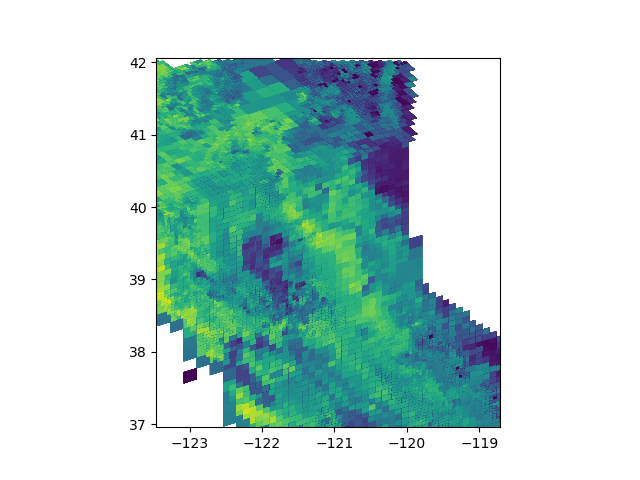

In [26]:
ax = df.plot(column = 'faparVal_myMedian')
#df.loc[df['faparVal_myMedian'].isna()].plot(column = 'faparVal_myMean', ax = ax)

# I left off the date stamps!  But I can go back and get them from the filenames.

In [11]:
len(fapar2016)

383148

In [12]:
len(fapar2016) / len(ca_s2_df)

36.0

In [13]:
data_dir = '/home/scott/sat_aggs/'
csvfiles = {}
for dirpath, dirnames, filenames in os.walk(data_dir):
    for filename in [f for f in filenames if f.endswith(".csv")]:
        csvfiles[filename] = (os.path.join(dirpath, filename))

In [14]:
csvfiles.keys()

dict_keys(['20161031_agg.csv', '20160710_agg.csv', '20160920_agg.csv', '20170630_agg.csv', '20170120_agg.csv', '20161231_agg.csv', '20160810_agg.csv', '20170510_agg.csv', '20170320_agg.csv', '20160520_agg.csv', '20160229_agg.csv', '20170228_agg.csv', '20170831_agg.csv', '20170520_agg.csv', '20170110_agg.csv', '20190110_agg.csv', '20160910_agg.csv', '20171020_agg.csv', '20170930_agg.csv', '20170731_agg.csv', '20170610_agg.csv', '20160420_agg.csv', '20160510_agg.csv', 'fapar2016.csv', '20171010_agg.csv', '20170910_agg.csv', '20160620_agg.csv', '20160110_agg.csv', '20170720_agg.csv', '20160930_agg.csv', '20160731_agg.csv', '20170310_agg.csv', '20170220_agg.csv', '20170410_agg.csv', '20160820_agg.csv', '20160331_agg.csv', '20160410_agg.csv', '20160210_agg.csv', '20160120_agg.csv', '20160831_agg.csv', '20160320_agg.csv', '20170420_agg.csv', '20160430_agg.csv', '20170430_agg.csv', '20161210_agg.csv', '20161120_agg.csv', '20160310_agg.csv', '20171031_agg.csv', '20160720_agg.csv', '20160131_ag

In [ ]:
for file in csvfiles.keys():
    df = pd.read_csv(file)

In [55]:
file = list(csvfiles.keys())[0]
file


'20161031_agg.csv'

In [56]:
df = pd.read_csv(csvfiles[file])
df.head()

,mergeKey,latIdx_min,latIdx_max,latIdx_myMean,latIdx_myMedian,latIdx_myStd,latIdx_size,latIdx_count,latIdx_nunique,lat_min,...,faparVal_count,faparVal_nunique,faparMask_min,faparMask_max,faparMask_myMean,faparMask_myMedian,faparMask_myStd,faparMask_size,faparMask_count,faparMask_nunique
0,54c934,0,32,11.703905,11.0,7.712635,2023,2023,33,41.958333,...,2023,263,False,True,0.001483,False,0.038480,2023,2023,2
1,54c9354,19,32,25.145631,25.0,3.028691,206,206,14,41.958333,...,206,129,False,True,0.004854,False,0.069504,206,206,2
2,54c935c,14,27,20.281553,20.0,3.038323,206,206,14,41.973214,...,206,115,False,False,0.000000,False,0.000000,206,206,1
3,54c9364,9,22,15.409756,15.0,3.053651,205,205,14,41.988095,...,205,112,False,False,0.000000,False,0.000000,205,205,1
4,54c9414,8,22,15.014563,15.0,3.063214,206,206,15,41.988095,...,206,49,False,True,0.009709,False,0.098053,206,206,2


In [57]:
dateStart = file.find(str(year))
date = file[dateStart:dateStart+8]
date


'20161031'

In [63]:
#df['date'] = date[0:4] + '-' + date[5:7] + '-' + date[7:]
dateFormatted = date[0:4] + '-' + date[4:6] + '-' + date[6:]
dateFormatted

'2016-10-31'

In [64]:
df['date'] = dateFormatted
df.head()

,mergeKey,latIdx_min,latIdx_max,latIdx_myMean,latIdx_myMedian,latIdx_myStd,latIdx_size,latIdx_count,latIdx_nunique,lat_min,...,faparVal_nunique,faparMask_min,faparMask_max,faparMask_myMean,faparMask_myMedian,faparMask_myStd,faparMask_size,faparMask_count,faparMask_nunique,date
0,54c934,0,32,11.703905,11.0,7.712635,2023,2023,33,41.958333,...,263,False,True,0.001483,False,0.038480,2023,2023,2,2016-10-31
1,54c9354,19,32,25.145631,25.0,3.028691,206,206,14,41.958333,...,129,False,True,0.004854,False,0.069504,206,206,2,2016-10-31
2,54c935c,14,27,20.281553,20.0,3.038323,206,206,14,41.973214,...,115,False,False,0.000000,False,0.000000,206,206,1,2016-10-31
3,54c9364,9,22,15.409756,15.0,3.053651,205,205,14,41.988095,...,112,False,False,0.000000,False,0.000000,205,205,1,2016-10-31
4,54c9414,8,22,15.014563,15.0,3.063214,206,206,15,41.988095,...,49,False,True,0.009709,False,0.098053,206,206,2,2016-10-31


In [65]:
df2 = df.drop(['latIdx_min',
               'latIdx_max',
               'latIdx_myMean',
               'latIdx_myMedian',
               'latIdx_myStd',
               'latIdx_size',
               'latIdx_count',
               'latIdx_nunique',
               'lonIdx_min',
               'lonIdx_max',
               'lonIdx_myMean',
               'lonIdx_myMedian',
               'lonIdx_myStd',
               'lonIdx_size',
               'lonIdx_count',
               'lonIdx_nunique'],
              axis = 1)

In [66]:
df2.head()

,mergeKey,lat_min,lat_max,lat_myMean,lat_myMedian,lat_myStd,lat_size,lat_count,lat_nunique,lon_min,...,faparVal_nunique,faparMask_min,faparMask_max,faparMask_myMean,faparMask_myMedian,faparMask_myStd,faparMask_size,faparMask_count,faparMask_nunique,date
0,54c934,41.958333,42.053571,42.018738,42.020833,0.022954,2023,2023,33,-121.610119,...,263,False,True,0.001483,False,0.038480,2023,2023,2,2016-10-31
1,54c9354,41.958333,41.997024,41.978733,41.979167,0.009014,206,206,14,-121.526786,...,129,False,True,0.004854,False,0.069504,206,206,2,2016-10-31
2,54c935c,41.973214,42.011905,41.993210,41.994048,0.009043,206,206,14,-121.479167,...,115,False,False,0.000000,False,0.000000,206,206,1,2016-10-31
3,54c9364,41.988095,42.026786,42.007709,42.008929,0.009088,205,205,14,-121.431548,...,112,False,False,0.000000,False,0.000000,205,205,1,2016-10-31
4,54c9414,41.988095,42.029762,42.008885,42.008929,0.009117,206,206,15,-121.172619,...,49,False,True,0.009709,False,0.098053,206,206,2,2016-10-31


In [67]:
df2.columns

Index(['mergeKey', 'lat_min', 'lat_max', 'lat_myMean', 'lat_myMedian',
       'lat_myStd', 'lat_size', 'lat_count', 'lat_nunique', 'lon_min',
       'lon_max', 'lon_myMean', 'lon_myMedian', 'lon_myStd', 'lon_size',
       'lon_count', 'lon_nunique', 'faparVal_min', 'faparVal_max',
       'faparVal_myMean', 'faparVal_myMedian', 'faparVal_myStd',
       'faparVal_size', 'faparVal_count', 'faparVal_nunique', 'faparMask_min',
       'faparMask_max', 'faparMask_myMean', 'faparMask_myMedian',
       'faparMask_myStd', 'faparMask_size', 'faparMask_count',
       'faparMask_nunique', 'date'],
      dtype='object')

In [68]:
len(df2)

10643

In [69]:
file

'20161031_agg.csv'

In [71]:
date

'20161031'

In [72]:
'/home/scott/sat_aggs/' + file[0:-4] + '_date' + file[-4:]

'/home/scott/sat_aggs/20161031_agg_date.csv'

In [73]:
df2.to_csv('/home/scott/sat_aggs/' + file[0:-4] + '_date' + file[-4:])

In [39]:
ca_s2_df['mergeKey'] = ca_s2_df['S2_Cells_I']
df3 = ca_s2_df.merge(df2, on = 'mergeKey')
len(df3)

10643

<IPython.core.display.Javascript object>


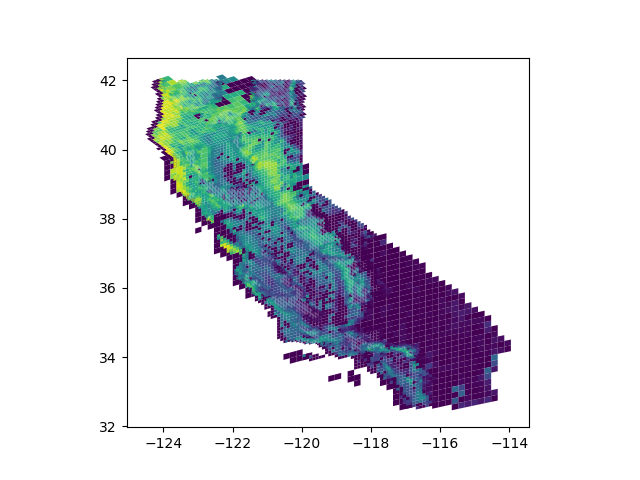

In [40]:
df3.plot(column = 'faparVal_myMean')

<IPython.core.display.Javascript object>


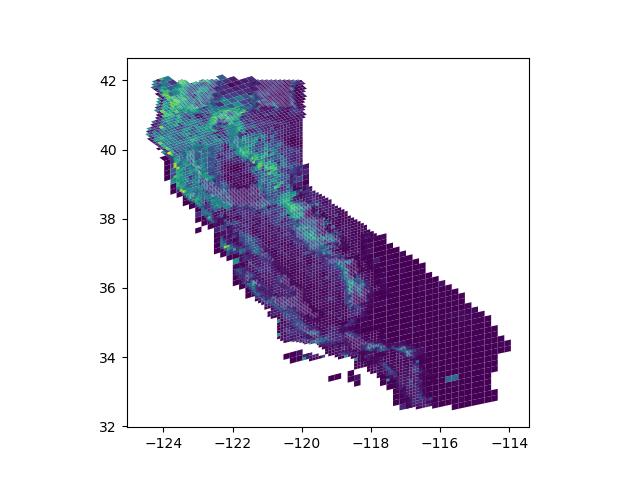

In [42]:
df3.plot(column = 'faparVal_min')

<IPython.core.display.Javascript object>


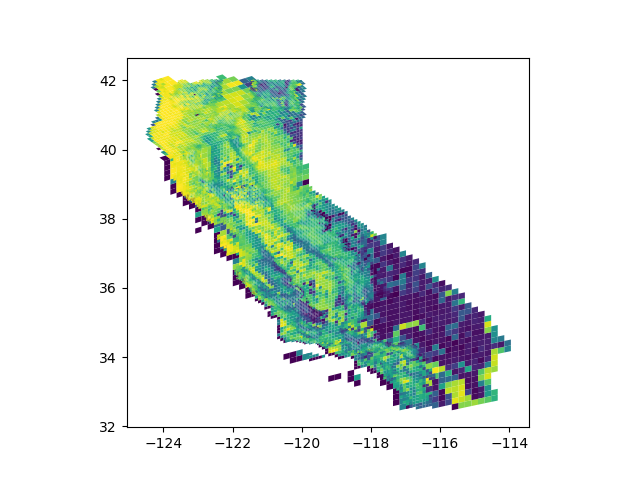

In [43]:
df3.plot(column = 'faparVal_max')

<IPython.core.display.Javascript object>


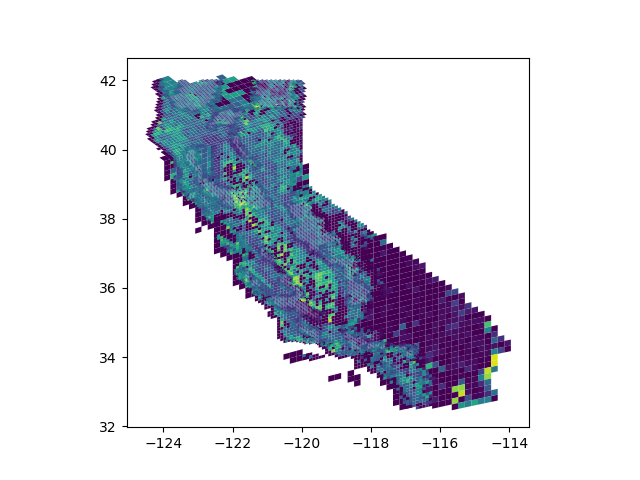

In [44]:
df3.plot(column = 'faparVal_myStd')

<IPython.core.display.Javascript object>


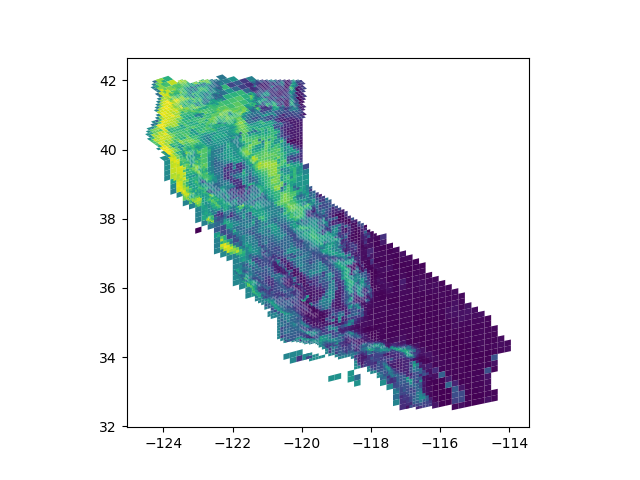

In [47]:
df3.plot(column = 'faparVal_myMedian')

In [76]:
#for year in range(2016, 2019):
year = 2016
dates = []


data_dir = '/home/scott/sat_aggs/'
csvfiles = {}
for dirpath, dirnames, filenames in os.walk(data_dir):
    for filename in [f for f in filenames if f.endswith(".csv")]:
        csvfiles[filename] = (os.path.join(dirpath, filename))

for filename, fullpath in csvfiles.items():
    dateStart = filename.find(str(year))
    if dateStart!= -1: #file includes date of interest
        date = filename[dateStart:dateStart+8]  # 20161031 for example
        dateFormatted = date[0:4] + '-' + date[4:6] + '-' + date[6:]   #2016-10-31 for example
        dates.append(date)
        with open(fullpath, 'rb') as f:
            df = pd.read_csv(f)
        df['date'] = dateFormatted
        df2 = df.drop(['latIdx_min',
               'latIdx_max',
               'latIdx_myMean',
               'latIdx_myMedian',
               'latIdx_myStd',
               'latIdx_size',
               'latIdx_count',
               'latIdx_nunique',
               'lonIdx_min',
               'lonIdx_max',
               'lonIdx_myMean',
               'lonIdx_myMedian',
               'lonIdx_myStd',
               'lonIdx_size',
               'lonIdx_count',
               'lonIdx_nunique'],
              axis = 1)
        df2.to_csv(data_dir + 'dated/' + filename[0:-4] + '_date' + filename[-4:])  #/home/scott/sat_aggs/20161031_agg_date.csv for example


sorted(dates)

['20160110',
 '20160120',
 '20160131',
 '20160210',
 '20160220',
 '20160229',
 '20160310',
 '20160320',
 '20160331',
 '20160410',
 '20160420',
 '20160430',
 '20160510',
 '20160520',
 '20160531',
 '20160610',
 '20160620',
 '20160630',
 '20160710',
 '20160720',
 '20160731',
 '20160810',
 '20160820',
 '20160831',
 '20160910',
 '20160920',
 '20160930',
 '20161010',
 '20161020',
 '20161031',
 '20161110',
 '20161120',
 '20161130',
 '20161210',
 '20161220',
 '20161231']

In [77]:
dates = []
data_dir = '/home/scott/sat_aggs/'
csvfiles = {}
for dirpath, dirnames, filenames in os.walk(data_dir):
    for filename in [f for f in filenames if f.endswith(".csv")]:
        csvfiles[filename] = (os.path.join(dirpath, filename))

for year in range(2017, 2019):
    #year = 2016

    for filename, fullpath in csvfiles.items():
        dateStart = filename.find(str(year))
        if dateStart!= -1: #file includes date of interest
            date = filename[dateStart:dateStart+8]  # 20161031 for example
            dateFormatted = date[0:4] + '-' + date[4:6] + '-' + date[6:]   #2016-10-31 for example
            dates.append(date)
            with open(fullpath, 'rb') as f:
                df = pd.read_csv(f)
            df['date'] = dateFormatted
            df2 = df.drop(['latIdx_min',
                   'latIdx_max',
                   'latIdx_myMean',
                   'latIdx_myMedian',
                   'latIdx_myStd',
                   'latIdx_size',
                   'latIdx_count',
                   'latIdx_nunique',
                   'lonIdx_min',
                   'lonIdx_max',
                   'lonIdx_myMean',
                   'lonIdx_myMedian',
                   'lonIdx_myStd',
                   'lonIdx_size',
                   'lonIdx_count',
                   'lonIdx_nunique'],
                  axis = 1)
            df2.to_csv(data_dir + 'dated/' + filename[0:-4] + '_date' + filename[-4:])  #/home/scott/sat_aggs/20161031_agg_date.csv for example


sorted(dates)

['20170110',
 '20170120',
 '20170131',
 '20170210',
 '20170220',
 '20170228',
 '20170310',
 '20170320',
 '20170331',
 '20170410',
 '20170420',
 '20170430',
 '20170510',
 '20170520',
 '20170531',
 '20170610',
 '20170620',
 '20170630',
 '20170710',
 '20170720',
 '20170731',
 '20170810',
 '20170820',
 '20170831',
 '20170910',
 '20170920',
 '20170930',
 '20171010',
 '20171020',
 '20171031',
 '20171110',
 '20171120',
 '20171130',
 '20171210',
 '20171220',
 '20171231',
 '20180110',
 '20180120',
 '20180131',
 '20180210',
 '20180220',
 '20180228',
 '20180310',
 '20180320',
 '20180331',
 '20180410',
 '20180420',
 '20180430',
 '20180510',
 '20180520',
 '20180531',
 '20180610',
 '20180620',
 '20180630',
 '20180710',
 '20180720',
 '20180731',
 '20180810',
 '20180820',
 '20180831',
 '20180910',
 '20180920',
 '20180930',
 '20181010',
 '20181020',
 '20181031',
 '20181110',
 '20181120',
 '20181130',
 '20181210',
 '20181220',
 '20181231']